# model_clk

**Author:** Marilyn Braojos Gutierrez\
**Purpose:** This program aims to plot the clock bias obtained from final clock bias files with .CLK file extension GPS for 30S intervals.\
**PhD Milestone:** #1: *Leverage deep learning models to GPS satellite clock bias corrections.*\
**Project:** This program is Step (1) in this PhD milestone. Obtaining the data is the first critical step.\
**References:**\
N/A

In [1]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

# Function to load and process data for a given station
def load_station_data(station):
    filepath = f'/Volumes/MARI/ssdl_gps/clk_npz_sat/G21/{station}_gps_clk_2035_G21.npz'
    clk = np.load(filepath)

    # Extract the arrays
    satellite = clk['satellite']
    yyyy = clk['yyyy']
    mm = clk['mm']
    dd = clk['dd']
    hh = clk['hh']
    mi = clk['mi']
    ss = clk['ss']
    clock_bias = clk['clock_bias_vals']
    ver = clk['vers']
    filepath = clk['filename']

    # Combine date and time into datetime objects
    epochs = [datetime(year, month, day, hour, minute, second)
              for year, month, day, hour, minute, second 
              in zip(yyyy, mm, dd, hh, mi, ss)]
    
    return epochs, clock_bias

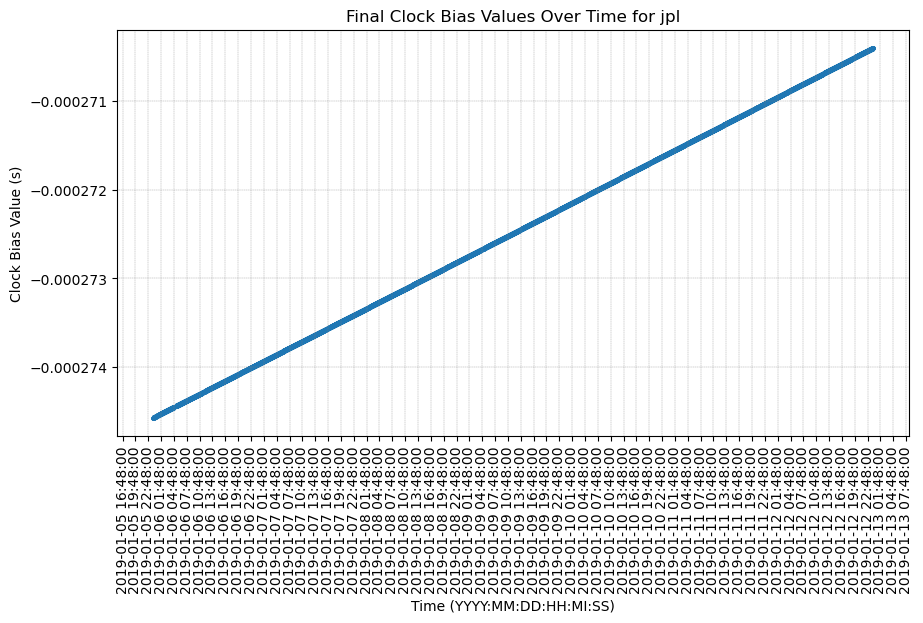

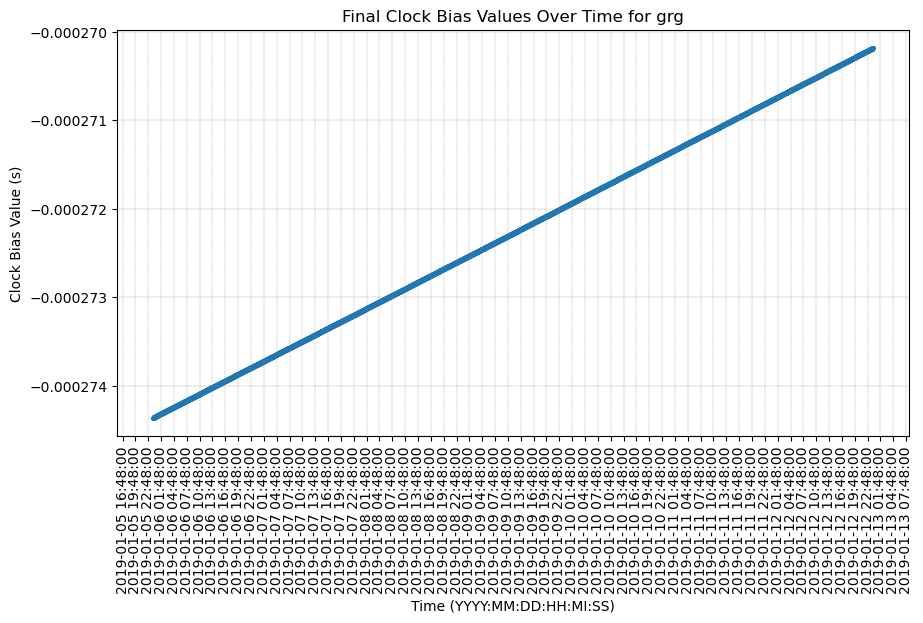

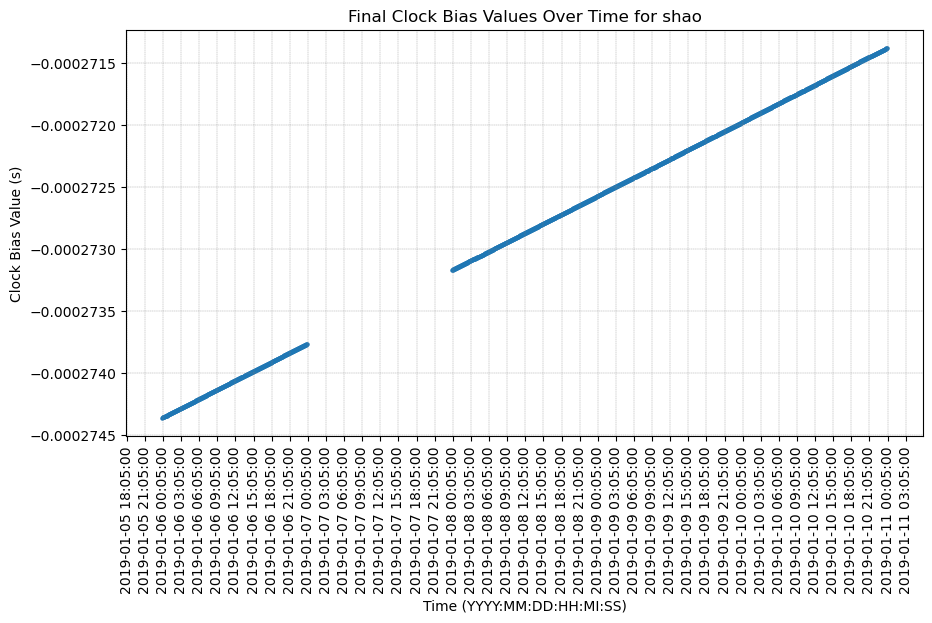

In [3]:
stations = ['jpl', 'grg', 'shao']

# Plot each station individually
for station in stations:
    epochs, clock_bias = load_station_data(station)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(epochs, clock_bias, s = 5)
    plt.xlabel('Time (YYYY:MM:DD:HH:MI:SS)')
    plt.ylabel('Clock Bias Value (s)')
    plt.title(f'Final Clock Bias Values Over Time for {station}')
    
    # Format the x-axis to show dates correctly
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=180))  # Set major ticks every 3 hours
    
    plt.tight_layout()
    plt.grid(color='gray', linestyle='--', linewidth=0.25)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# len(clock_bias)
# len(epochs)
# epochs

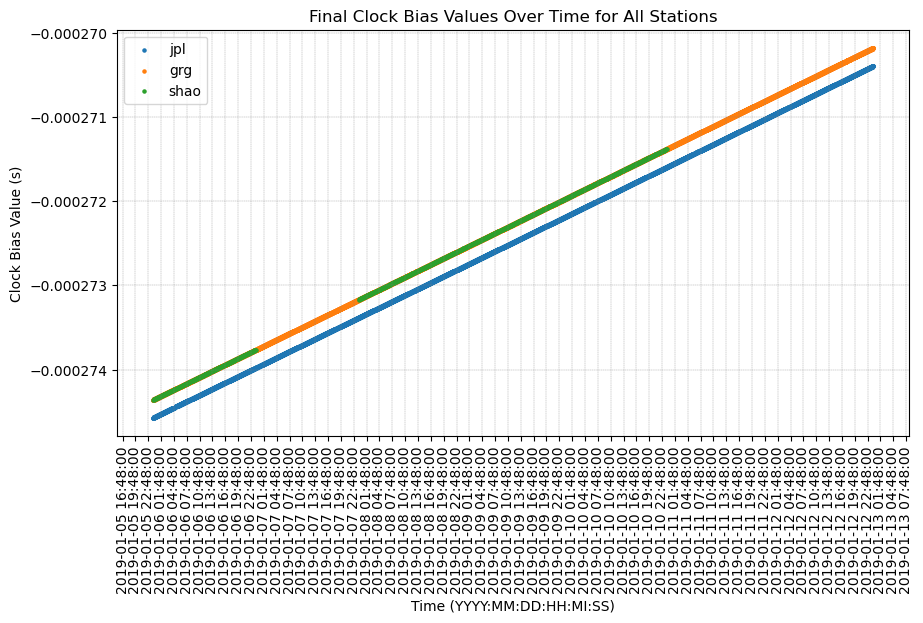

In [4]:
# Plot all stations in a single plot
plt.figure(figsize=(10, 5))

for station in stations:
    epochs, clock_bias = load_station_data(station)
    plt.scatter(epochs, clock_bias, label=station, s = 5)

plt.xlabel('Time (YYYY:MM:DD:HH:MI:SS)')
plt.ylabel('Clock Bias Value (s)')
plt.title('Final Clock Bias Values Over Time for All Stations')
# plt.ylim(-0.0002734,-0.0002722)
# plt.xlim(datetime(2019, 1, 8, 0, 0, 0), datetime(2019, 1, 9, 0, 0, 0))

# Format the x-axis to show dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=180))  # Set major ticks every 3 hours

plt.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=0.25)
plt.xticks(rotation=90)
plt.legend()
plt.show()